### PyIntro-A2 - Numpy, Loading and saving data

## Handling filepath
To handle files you need to tell to python where they are.
Because of differences in different system, it is recoomended to use ```os``` module to handle filepaths in Python.


In [60]:
import os

os.name

'posix'

Usual architectures are:

- **posix:** linux, MacOS, FreeBSD, unix, [Microsoft WSL](https://docs.microsoft.com/en-us/windows/wsl/wsl2-index),...
- **nt:** Windows
- **java:** Adroid


## Python working directory

The current working directory is the folder in which the Python script is operating. It is the default directory where new files will be created by python commands when no path will be explicitly provided.

### Find current working directory: `os.getcwd()`

In [41]:
import os
os.getcwd()

'/home/petrokh/data2/python_course/py_course/a2-PyIntro'

### Save the working directory path:

We will save the `/YOUR/PATH/py_course/a2-PyIntro` in the variable wrkdir for future usage.

In [47]:
import os

# Default:
wrkdir = os.getcwd()

wrkdir = os.path.normpath(wrkdir) #shows full path
datadir = os.path.join(wrkdir,"data") # add data directory to full path

print(wrkdir)
print(datadir)

/home/petrokh/data2/python_course/py_course/a2-PyIntro
/home/petrokh/data2/python_course/py_course/a2-PyIntro/data


To extend path it is reccomended to use <b>os.path.join</b>. Mainly because directory separator is different in Windows and Linux (Unix) systems.

In [50]:
#print directory separator.
os.path.sep

'/'

### NumPy
Numerical python (Numpy)  probably the most used library im python.
Here is a nice [Numpy introduction](https://numpy.org/doc/stable/user/quickstart.html) 


In [61]:
import numpy as np

Numerical python uses another data structure called <b>numpy array</b>.
It can be created from list using <b>np.array()</b> function.


In [45]:
npa = np.array([1,2,3,4,5])
npa

array([1, 2, 3, 4, 5])

### Numpy array vs List
Numpy array:
- must be homogeneous in datatype
- can be multidimentional (list has one dimention)
    - you can slice over each dimentioin simultaneously
- tailored for work with numerical arrays.


In [67]:
#can be multidimentional
list_in_list = [[1,2,3,4,5],
               [1,2,3,4,5]]
print(f'list length is {len(list_in_list)}')
npa = np.array(list_in_list)

print(f'numpy array shape is {npa.shape}')

list length is 2
numpy array shape is (2, 5)


Numpy array tailored for work with numbers arrrays of numbers.

In [92]:
print(npa)
print(npa*5)
print('a few methods with lists')
print(dir(list)[-11:])
print('many more numpy array has')
print(dir(npa)[-70:])

[[1 2 3 4 5]
 [1 2 3 4 5]]
[[ 5 10 15 20 25]
 [ 5 10 15 20 25]]
a few methods with lists
['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
many more numpy array has
['all', 'any', 'argmax', 'argmin', 'argpartition', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'ctypes', 'cumprod', 'cumsum', 'data', 'diagonal', 'dot', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'partition', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']


How to load data into python?
Most of the time you do not need "low level" operations with files. If the file has good structure containing columns of numbers, it is easy to read using numerical Python functions like ```numpy.loadtxt``` and ```numpy.genfromtxt```.
Lets look on the datafile again.
For example here is a part of NWChem output

In [70]:
''''
@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.00553  28155.3
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7
'''
pass

Let's try lo load using ```np.genfromtxt``` function. We get error because "Delta E" column name has a space. The function treats spacas as column delimiters, and the first column has 10 lines in this case. While the rest of the file has 9. 

In [11]:
import numpy as np
data_from_file = np.genfromtxt(datafile)

ValueError: Some errors were detected !
    Line #2 (got 9 columns instead of 10)
    Line #3 (got 9 columns instead of 10)
    Line #4 (got 9 columns instead of 10)
    Line #5 (got 9 columns instead of 10)
    Line #6 (got 9 columns instead of 10)
    Line #7 (got 9 columns instead of 10)
    Line #8 (got 9 columns instead of 10)
    Line #9 (got 9 columns instead of 10)
    Line #10 (got 9 columns instead of 10)
    Line #11 (got 9 columns instead of 10)
    Line #12 (got 9 columns instead of 10)
    Line #13 (got 9 columns instead of 10)
    Line #14 (got 9 columns instead of 10)
    Line #15 (got 9 columns instead of 10)

To avoid this we can use ```skip_header``` argument of the ```gen_from_txt``` function. In the same time we can skip the last row using ```skip_footer``` arguement.

In [71]:
data_from_file = np.genfromtxt(datafile,
                               skip_header = 2, # skip upper 2 rows
                               skip_footer = 1, # skip last row
                              )
print(line) # print one line of the file for comparison
data_from_file[0,:]

@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7



array([      nan,     0.   , -6095.125,       nan,     0.037,     0.009,
           0.   ,     0.   ,  1391.5  ])

Lets get rid of columns wich generate "nan" value. <br>
We can select wich colimmns to use using  ```usecols```  parameter. 

In [15]:
data_from_file = np.genfromtxt(datafile,
                               skip_header = 2, # skip upper 2 rows
                               skip_footer = 1, # skip last row
                               usecols = [1, 2, 4, 5, 6, 7, 8,],
                              )
#print(line) # print one line of the file for comparison
np.set_printoptions(precision=3) # set printing to less numbers
np.set_printoptions(suppress=True) # suppress scientific notatione for small numbers
data_from_file[:,[1,4]] # then we get what columns we want from loaded array

array([[-6095.125,     0.   ],
       [-6095.258,     0.325],
       [-6095.263,     0.063],
       [-6095.264,     0.032],
       [-6095.265,     0.027],
       [-6095.265,     0.023],
       [-6095.265,     0.008],
       [-6095.265,     0.015],
       [-6095.265,     0.006],
       [-6095.265,     0.002],
       [-6095.265,     0.002],
       [-6095.265,     0.001]])

Matplotlib is library used for plotting.
Here is a quick example 

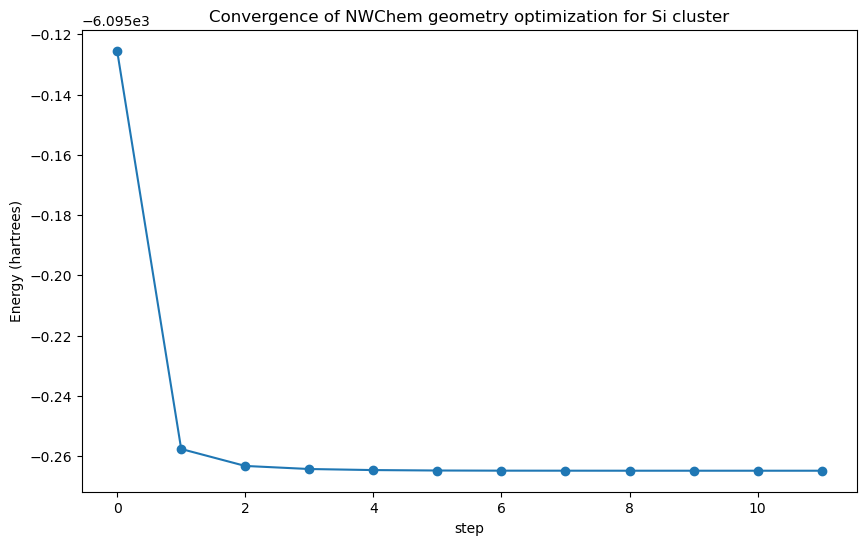

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data_from_file[:,1],'-o')
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')
plt.show()

In [ ]:
Can we read all data in?

In [72]:
data_from_file_as_strings = np.genfromtxt(datafile,
                               skip_header = 2, # skip upper 2 rows
                               skip_footer = 1, # skip last row
                               dtype = str)
                              
data_from_file_as_strings.shape

(12, 9)

In [73]:
data_from_file_as_strings

array([['@', '0', '-6095.12544083', '0.0D+00', '0.03686', '0.00936',
        '0.00000', '0.00000', '1391.5'],
       ['@', '1', '-6095.25762870', '-1.3D-01', '0.00732', '0.00168',
        '0.32456', '0.84140', '10468.0'],
       ['@', '2', '-6095.26325979', '-5.6D-03', '0.00233', '0.00056',
        '0.06294', '0.14009', '11963.5'],
       ['@', '3', '-6095.26428124', '-1.0D-03', '0.00109', '0.00024',
        '0.03245', '0.10269', '13331.9'],
       ['@', '4', '-6095.26463203', '-3.5D-04', '0.00057', '0.00013',
        '0.02737', '0.09112', '14710.8'],
       ['@', '5', '-6095.26477615', '-1.4D-04', '0.00043', '0.00009',
        '0.02259', '0.08615', '20211.1'],
       ['@', '6', '-6095.26482624', '-5.0D-05', '0.00015', '0.00002',
        '0.00831', '0.03147', '21726.1'],
       ['@', '7', '-6095.26483584', '-9.6D-06', '0.00021', '0.00004',
        '0.01473', '0.05265', '24890.5'],
       ['@', '8', '-6095.26484405', '-8.2D-06', '0.00005', '0.00001',
        '0.00555', '0.01929', '26448

### Saving files easy way.
Numpy also has ```savetxt``` function. Which allows easily save array into txt file.

In [ ]:
np.savetxt('data/extracted_data.csv',data_from_file,delimiter=',')
np.savetxt('data/extracted_data.txt',data_from_file,delimiter='\t')

## A few notes
  - if you need to work with mixed data have a look on [pandas](https://pandas.pydata.org/) module. It aslo can read excell files into python.
  - I rarely had to write a code to load data myself. Most of the time I have found ready solution.

## More Sophisticated String Formatting and Processing
Strings are a big deal in most modern languages, and hopefully the previous sections helped underscore how versatile Python's string processing techniques are. We will continue this topic in this chapter.

We can print out lines in Python using the print command. 

In [ ]:
print("I have 3 errands to run")

In IPython we don't even need the print command, since it will display the last expression not assigned to a variable.

In [ ]:
"I have 3 errands to run"

**print** even converts some arguments to strings for us:

In [ ]:
a,b,c = 1,2,3
print(f"The variables are {a} {b} {c}")

As versatile as this is, you typically need more freedom over the data you print out. For example, what if we want to print a bunch of data to exactly 4 decimal places? We can do this using formatted strings.

Formatted strings can be achieved using the format funtions of the strings. For examples check https://pyformat.info/.

For example,

In [ ]:
print(f"Pi as a decimal = {np.pi:.0f}")
print(f"Pi as a float = {np.pi:f}")
print(f"Pi with 4 decimal places = {np.pi:.4f}")
print(f"Pi with overall fixed length of 10 spaces, with 6 decimal places = {np.pi:10.6f}")
print(f"Pi as in exponential format = {np.pi:e}")

We can also pipe several variables, or even print the same more than once:

In [ ]:
print(f"The variables specified earlier are {a:e}, {b:.4f}, and {c:d} [repeated {a:d}]")

This is a simple formatting structure that will satisfy most of your string formatting needs.More information check https://realpython.com/python-f-strings/ or http://zetcode.com/python/fstring/.

<div class="alert alert-info"> Avoid using old C formating string methods. They are weaker and prompt to errors.

Recall we discussed multiline strings. We can put format characters in these as well, and fill them with them as before.

In [ ]:
date = "July 1, 2013"
name = "Valued Customer Bob"
reason = "alien attack"

form_letter = f"""\

          {date:s}

Dear {name:s},

We regret to inform you that your product did not
ship today due to {reason:s}.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""




In [ ]:
print(form_letter)

If you need to reuse many time the string while substitutting by different values use `str.format()`

In [ ]:
form_letter = """\

          {0:s}

Dear {1:s},

We regret to inform you that your product did not
ship today due to {2:s}.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""



In [ ]:
print(form_letter.format("July 1, 2013","Valued Customer Bob","alien attack"))

The problem with a long block of text like this is that it's often hard to keep track of what all of the variables are supposed to stand for. There's an alternate format where you can pass a dictionary into the formatted string, and give a little bit more information to the formatted string itself. This method looks like:

As a scientist, you're less likely to be sending bulk mailings to a bunch of customers. But these are great methods for generating and submitting lots of similar runs, say scanning a bunch of different structures to find the optimal configuration for something. There are methods less prompt to error such as the following  example, that we can use the following template for NWChem input files:

In [ ]:
nwchem_format = """
start {0[jobname]:s}

title "{0[thetitle]:s}"
charge {0[charge]:d}

geometry units angstroms print xyz autosym
{0[geometry]:s}
end

basis
  * library 6-31G**
end

dft
  xc {0[dft_functional]:s}
  mult {0[multiplicity]:d}
end

task dft {0[jobtype]:s}
"""

If you want to submit a sequence of runs to a computer somewhere, it's pretty easy to put together a little script, maybe even with some more string formatting in it:

In [ ]:
oxygen_xy_coords = [(0,0),(0,0.1),(0.1,0),(0.1,0.1)]
charge = 0
multiplicity = 1
dft_functional = "b3lyp"
jobtype = "optimize"

geometry_template = """\
  O    {0[0]:.1f}    {0[1]:.1f}     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0"""

for i,xy in enumerate(oxygen_xy_coords):
    thetitle = "Water run #{0:d}".format(i)
    jobname = "h2o-{0:d}".format(i)
    geometry = geometry_template.format(xy)
    print ("---------")
    print (nwchem_format.format(dict(thetitle=thetitle,
                                     charge=charge,
                                     jobname=jobname,
                                     jobtype=jobtype,
                                     geometry=geometry,
                                     dft_functional=dft_functional,
                                     multiplicity=multiplicity)))

This is a very bad geometry for a water molecule, and it would be silly to run so many geometry optimizations of structures that are guaranteed to converge to the same single geometry, but you get the idea of how you can run vast numbers of simulations with a technique like this.

We used the `enumerate()` function to loop over both the indices and the items of a sequence, which is valuable when you want a clean way of getting both. `enumerate` is roughly equivalent to:

In [ ]:
def my_enumerate(seq):
    l = []
    for i in range(len(seq)):
        l.append((i,seq[i]))
    return l
my_enumerate(oxygen_xy_coords)

Although enumerate uses **generators** (see below) so that it doesn't have to create a big list, which makes it faster for really long sequenes.